In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import scipy.stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [3]:
matplotlib.style.use('seaborn-v0_8-whitegrid')

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Load palmerpenguins dataset

Source:
https://github.com/allisonhorst/palmerpenguins

In [4]:
penguins_original = pd.read_csv(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    )

# Remove null values

In [7]:
nan_indexes = penguins_original.index[penguins_original.isna().any(axis=1)]
penguins = penguins_original.dropna(axis = 0, how = 'any').copy()
# penguins

# Logistic Regression

## Mapping sex to numeric values

In [11]:
penguins.loc[:,'numeric_sex'] = penguins.sex.apply(lambda x: 0 if x == 'female' else 1)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1


# Model 1

In [12]:
smf.logit(
    formula = 'numeric_sex ~ \
            flipper_length_mm + bill_length_mm + bill_depth_mm \
            + C(island)',
        data = penguins
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.4793
Time:                        15:14:55   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

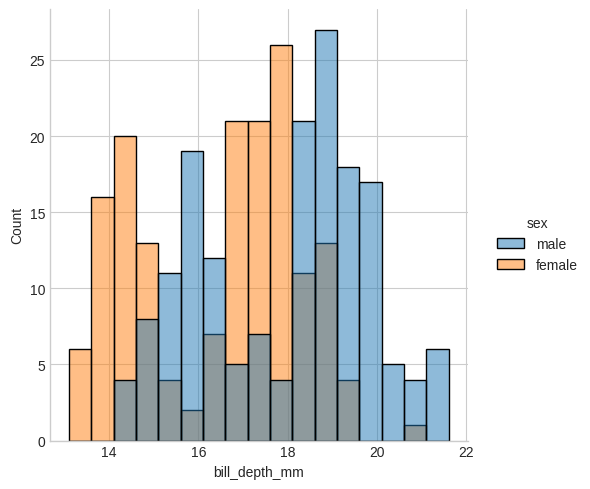

In [33]:
sns.displot(
    data = penguins,
    x = 'bill_depth_mm',
    hue = 'sex',
    binwidth = 0.5,
)

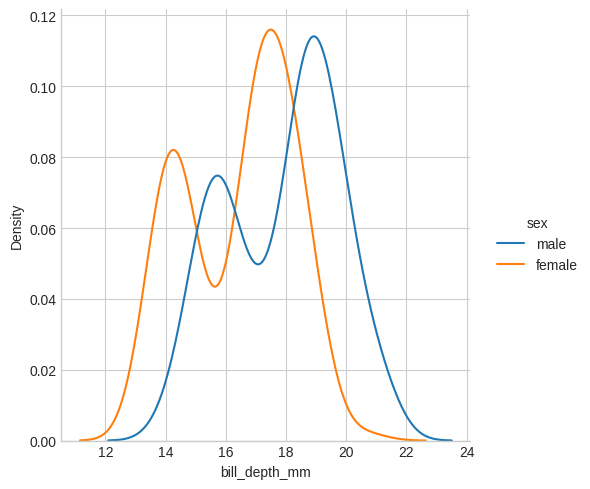

In [28]:
sns.displot(
    data = penguins,
    x = 'bill_depth_mm',
    hue = 'sex',
    kind = 'kde'
)

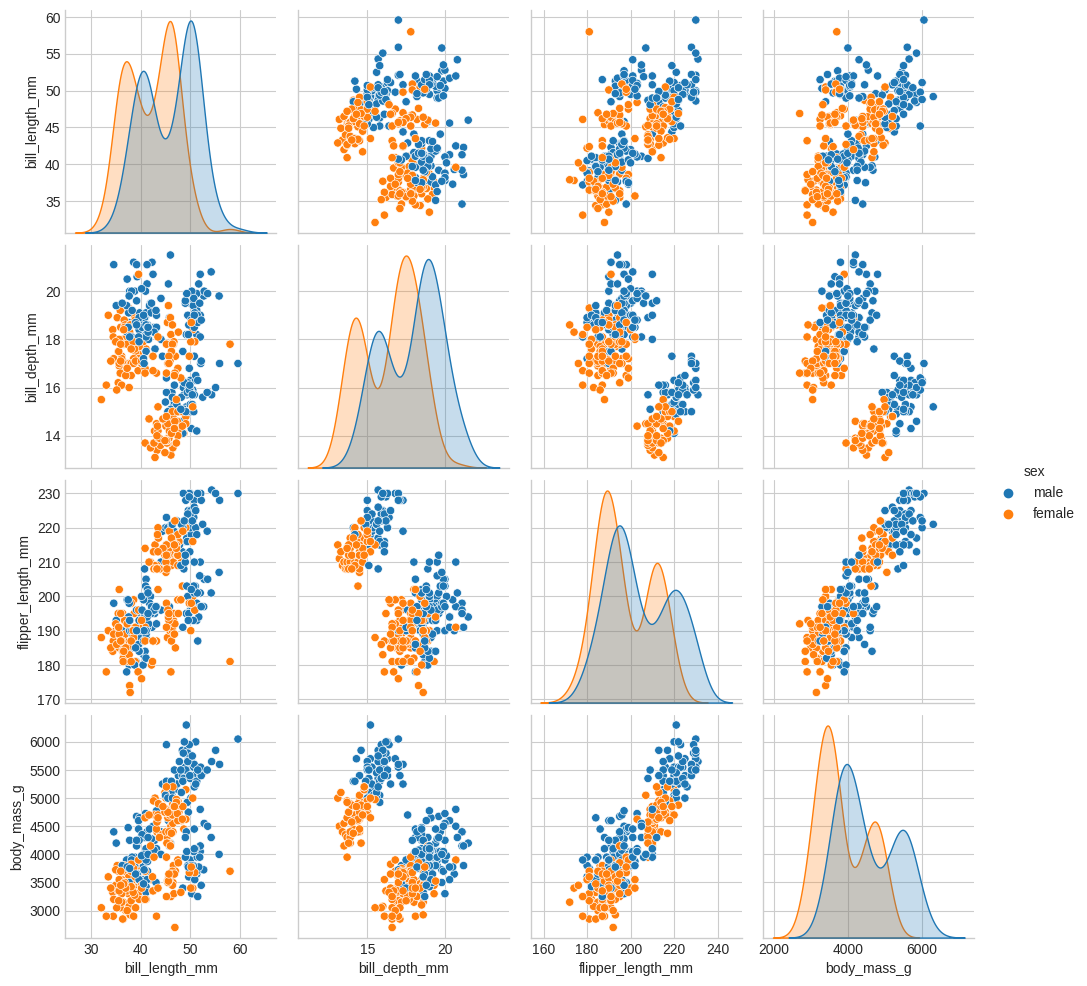

In [24]:
sns.pairplot(
    data = penguins.loc[:,penguins.columns[2:7]],
    hue = 'sex',
)

In [46]:
island_sex_table = pd.crosstab(
   penguins.island, penguins.sex,
)
island_sex_table

sex,female,male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


In [99]:
vc_table = (
    penguins.value_counts(['island', 'sex'])
    .reset_index(name = 'count')
)
vc_table

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


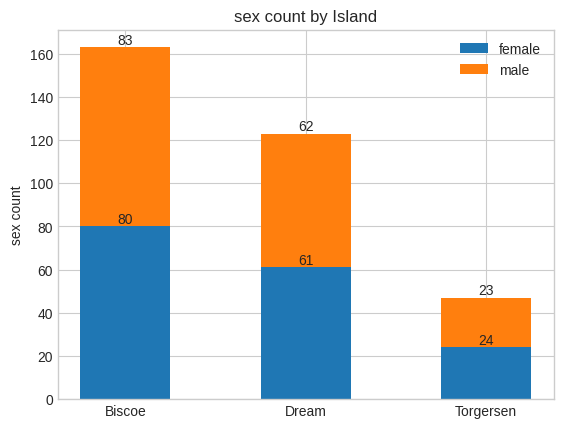

In [69]:
islands_list = island_sex_table.index
sex_list = island_sex_table.columns

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(3)

for i, isl in penguins.groupby('sex'):
    p = ax.bar(islands_list, island_sex_table.loc[:,i].values, width, bottom = bottom)

    plt.bar_label(p, labels = island_sex_table.loc[:,i].values)
    bottom += island_sex_table.loc[:,i].values

ax.set_ylabel('sex count')
ax.set_title('sex count by Island')
ax.legend(sex_list)
plt.show()


# species prediction

## is Adelie?

In [100]:
penguins_numeric_species_adelie = (
    penguins.copy().assign(
        is_adelie = lambda df: df.species.replace(
            ['Adelie', 'Gentoo', 'Chinstrap'],
            [1, 0, 0]
        )
    )
)

In [102]:
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ flipper_length_mm + C(sex)',
    data = penguins_numeric_species_adelie
).fit()

model_is_adelie.summary()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_adelie   No. Observations:                  333
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.4818
Time:                        16:28:53   Log-Likelihood:                -118.29
converged:                       True   LL-Null:                       -228.29
Covariance Type:            nonrobust   LLR p-value:                 1.693e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            40.5684      4.669      8.689      0.000      31.418      49.719
C(sex)[T.male]        1.2827      0.356      3.601      0.000       0.585       1.981
flipper_length_mm    -0.2097      0.024     -8.635      0.000      -0.257      -0.162
=====================================================================================
"""

In [103]:
model_is_adelie.params

Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [104]:
is_adelie_predictions = pd.DataFrame(
    dict(
        actual_adelie = penguins_numeric_species_adelie.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [107]:
is_adelie_predictions.loc[
    is_adelie_predictions.actual_adelie != is_adelie_predictions.predicted_values
    ].count()

actual_adelie       53
predicted_values    53
dtype: int64

In [105]:
(
    is_adelie_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name = 'count')
)

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


### Confusion Matrix

In [110]:
import sklearn.metrics

In [111]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_predictions.actual_adelie,
        is_adelie_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_predictions.actual_adelie,
    is_adelie_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409